In [1]:
#!pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.stats as stats
import statsmodels.api as sm

from component_module import doFourierAnalysis, performFourierAndLimitHarmonics, get_harmonic_time_differences, find_fundamental_frequency, calculate_phase_and_time_difference


In [12]:
#df = pd.read_csv('D:\GitHub\MSc-Project\SWaT DataSWaT 2015-12-23.csv')

#df = pd.read_csv('/home/loz/MSc/MSc_Project/SWaT DataSWaT 2015-12-23.csv')

In [3]:
#df = pd.read_csv('/home/loz/MSc/MSc_Project/SWaT_2015_12_23_for_tf.csv')

In [ ]:
df = pd.read_csv('/home/loz/MSc/MSc_Project/SWaT_2015_12_23_for_tf.csv')

In [13]:
#df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,date,time
0,2015-12-23 00:00:00,0.0,0.994030,0.5,1.0,0.0,0.509983,0.197627,0.500754,0.769136,...,0.0,0.958717,0.279476,0.962447,0.0,0.0,0.0,0.0,2015-12-23,00:00:00
1,2015-12-23 00:00:01,0.0,0.993523,0.5,1.0,0.0,0.509983,0.197627,0.501658,0.863706,...,0.0,0.958466,0.279476,0.962447,0.0,0.0,0.0,0.0,2015-12-23,00:00:01
2,2015-12-23 00:00:02,0.0,0.993523,0.5,1.0,0.0,0.509983,0.197627,0.503767,0.916761,...,0.0,0.957840,0.279476,0.962366,0.0,0.0,0.0,0.0,2015-12-23,00:00:02
3,2015-12-23 00:00:03,0.0,0.993467,0.5,1.0,0.0,0.494624,0.194993,0.506178,0.952045,...,0.0,0.957840,0.279476,0.961636,0.0,0.0,0.0,0.0,2015-12-23,00:00:03
4,2015-12-23 00:00:04,0.0,0.993072,0.5,1.0,0.0,0.494624,0.194993,0.509593,0.974452,...,0.0,0.958654,0.279476,0.961636,0.0,0.0,0.0,0.0,2015-12-23,00:00:04


In [6]:
columns_list = ['time', 'MV101','LIT101','FIT101','P101','FIT201','MV201']

In [9]:
df_prepped = df[columns_to_plot]
df_prepped.head()

,MV101,LIT101,FIT101,P101,FIT201,MV201
0,-1.55021,1.824135,-1.608031,0.585352,0.085272,0.579321
1,-1.55021,1.821131,-1.608031,0.585352,0.306260,0.579321
2,-1.55021,1.821131,-1.608031,0.585352,0.430235,0.579321
3,-1.55021,1.820797,-1.608031,0.585352,0.512685,0.579321
4,-1.55021,1.818460,-1.608031,0.585352,0.565044,0.579321


In [11]:
print(np.max(df.LIT101), np.min(df.LIT101))

1.850505049306704 -0.956710036733268


In [21]:
def plot_columns(df, columns_list):

    # Set the size of the plot
    plt.figure(figsize=(12, 6))

    # Loop through the columns and plot each one
    for column in columns_list:
        plt.plot(df.index, df[column], label=column)

    # Add title and labels
    plt.title('Signals Over Time')
    plt.xlabel('Time')
    #plt.yscale('log')
    plt.ylabel('Signal Value')

    #plt.xlim(1000,5000)
    # set y range to plot if passed
    #plt.ylim( -1, 3)

    # Show legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


In [23]:
#columns_to_plot = ['MV101','LIT101','FIT101','P101','FIT201','MV201']
columns_to_plot = ['LIT101','FIT101','FIT201']

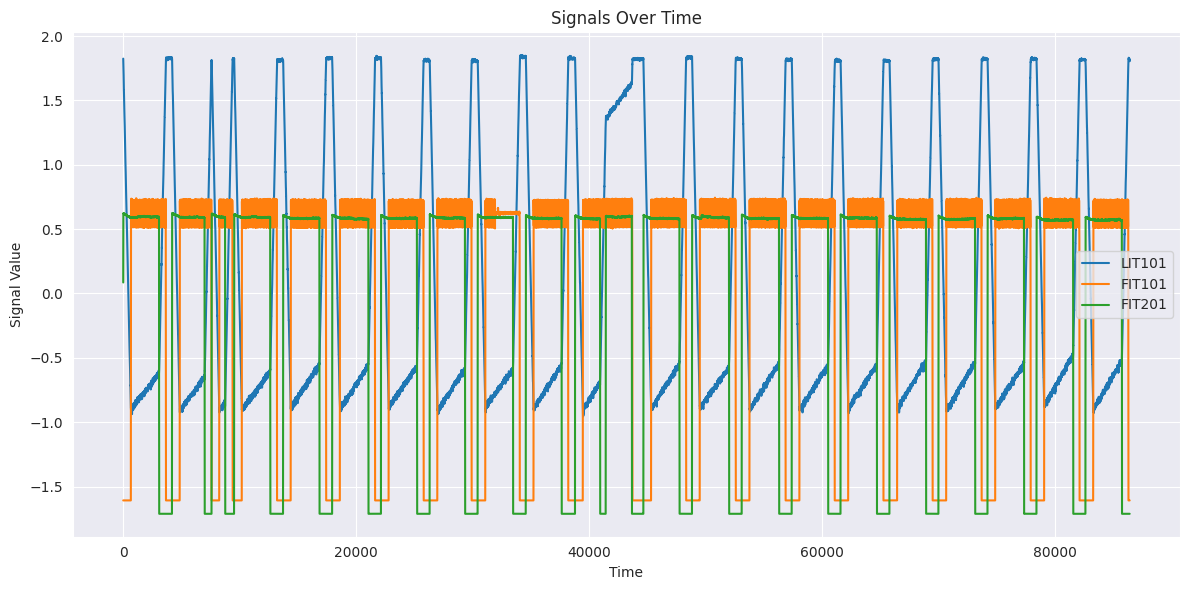

In [24]:
plot_columns(df_prepped, columns_to_plot)

/tmp/ipykernel_8829/4216789269.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, np.max(freq_lit101))  # Limit x-axis to non-negative frequencies


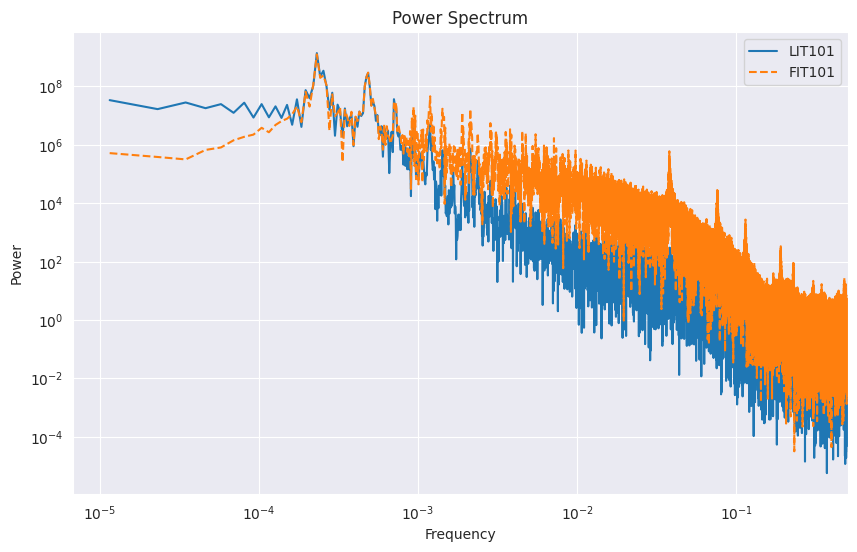

In [12]:
# Assuming df_prepped is already defined and contains 'LIT101' and 'FIT101' columns
freq_lit101, power_spectrum_lit101 = doFourierAnalysis(df_prepped, 'LIT101')
freq_fit101, power_spectrum_fit101 = doFourierAnalysis(df_prepped, 'FIT101')


# Plotting the Power Spectrum for both 'LIT101' and 'FIT101'
plt.figure(figsize=(10, 6))
plt.plot(freq_lit101, power_spectrum_lit101, label='LIT101')
plt.plot(freq_fit101, power_spectrum_fit101, label='FIT101', linestyle='--')
plt.title('Power Spectrum')
plt.xscale('log')
plt.xlabel('Frequency')
plt.yscale('log')
plt.ylabel('Power')
plt.xlim(0, np.max(freq_lit101))  # Limit x-axis to non-negative frequencies
plt.legend()
plt.show()

In [54]:
df

,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P203,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,P602
0,-1.608031,1.824135,-1.55021,0.585352,2.475287,-0.112313,0.578473,0.085272,0.579321,-1.699887,...,1.386669,0.072135,0.363321,-0.274278,-0.576233,-0.282796,-1.050090,-0.233109,-0.096308,-0.088802
1,-1.608031,1.821131,-1.55021,0.585352,2.475287,-0.112313,0.581718,0.306260,0.579321,0.588275,...,1.386669,0.072135,-0.623212,-0.274278,0.735024,-0.328344,-1.050090,-0.233109,-0.096308,-0.088802
2,-1.608031,1.821131,-1.55021,0.585352,2.475287,-0.112313,0.589288,0.430235,0.579321,0.588275,...,1.386669,0.072135,-0.723537,-0.274278,0.735024,-0.442179,-1.050090,-0.246041,-0.096308,-0.088802
3,-1.608031,1.820797,-1.55021,0.585352,2.341305,-0.124024,0.597939,0.512685,0.579321,0.588275,...,1.386669,0.072135,-0.297175,0.905646,0.735024,-0.442179,-1.050090,-0.362587,-0.096308,-0.088802
4,-1.608031,1.818460,-1.55021,0.585352,2.341305,-0.124024,0.610196,0.565044,0.579321,0.588275,...,1.386669,0.072135,0.681068,0.905646,0.735024,-0.294165,-1.050090,-0.362587,-0.096308,-0.088802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,-1.608031,1.805777,-1.55021,-1.708375,-1.062152,-0.053742,-1.027530,-1.712009,-1.662309,-1.699887,...,-1.192306,0.484623,-0.564728,-0.274278,-0.740172,0.024601,-0.925365,-0.077769,-0.095874,-0.088802
86396,-1.608031,1.805443,-1.55021,-1.708375,-1.062152,-0.053742,-1.027530,-1.712009,-1.662309,-1.699887,...,-1.192306,0.484623,-0.748667,-0.274278,-0.740172,-0.123413,-0.925365,-0.077769,-0.095874,-0.088802
86397,-1.608031,1.804441,-1.55021,-1.708375,-1.062152,-0.053742,-1.028251,-1.712009,-1.662309,-1.699887,...,-1.192306,0.269424,0.104122,-0.274278,-0.740172,-0.123413,-0.925365,-0.271985,-0.095874,-0.088802
86398,-1.608031,1.807111,-1.55021,-1.708375,-1.062152,-0.053742,-1.028251,-1.712009,-1.662309,-1.699887,...,-1.192306,0.215694,0.890072,-0.274278,-0.740172,-0.123413,-0.925365,-0.271985,-0.095874,-0.088802


In [53]:
# Calculate phase and time difference between LIT101 and FIT101
phase_difference, time_difference = calculate_phase_and_time_difference(df_prepped, 'MV101', 'FIT101')

# Display the phase difference in radians and the time difference in seconds
print(f"Phase Difference between LIT101 and FIT101: {phase_difference:.5f} radians")
print(f"Time Difference between LIT101 and FIT101: {time_difference:.5f} seconds")


Phase Difference between LIT101 and FIT101: -0.01204 radians
Time Difference between LIT101 and FIT101: -8.27879 seconds


In [17]:
calculate_phase_and_time_difference(df_prepped, 'LIT101', 'FIT101', dt=1 )

(2.5263780217198546, 1737.009577189895)

In [18]:
calculate_phase_and_time_difference(df_prepped, 'FIT101',  'LIT101', dt=1 )

(-2.5263780217198546, -1737.009577189895)

In [20]:
freq, power_spectrum = doFourierAnalysis(df,'LIT101')
fund_freq = find_fundamental_frequency(freq, power_spectrum)

In [25]:
(1/fund_freq)

28800.0

In [26]:
plt.plot(df[index],df.LIT101)

NameError: name 'index' is not defined

In [ ]:
column=['LIT101']

In [41]:
recon_signal, _ = performFourierAndLimitHarmonics(df,column,num_harmonics=6)

In [42]:
recon_signal.real

array([2.11126734e-05, 2.11126734e-05, 2.11126734e-05, ...,
       2.11126734e-05, 2.11126734e-05, 2.11126734e-05])

In [50]:
def performFourierAndLimitHarmonics_2(df=None, column_name=None,  series=None, num_harmonics=30):
    # Extract the data from the dataframe or series
    if df is not None and column_name is not None:
        data = df[column_name].values
    elif series is not None and isinstance(series, pd.Series):
        data = series.values
    else:
        raise ValueError("Please provide either a dataframe with a column or a series.")

    # Perform FFT on the data
    fft_data = np.fft.fft(data)
    N = len(data)

    # Compute the magnitude of the FFT and sort indices by magnitude in descending order
    magnitudes = np.abs(fft_data)
    indices = np.argsort(magnitudes)[::-1]  # Sort by magnitude in descending order

    # Initialize the FFT array for limited harmonics
    fft_data_limited = np.zeros(N, dtype=complex)

    # Keep the largest `num_harmonics` components, including the DC component (index 0)
    for i in range(num_harmonics):
        index = indices[i]
        fft_data_limited[index] = fft_data[index]

    # Inverse FFT to reconstruct the signal with limited harmonics
    reconstructed_signal = np.fft.ifft(fft_data_limited)

    return reconstructed_signal, fft_data_limited


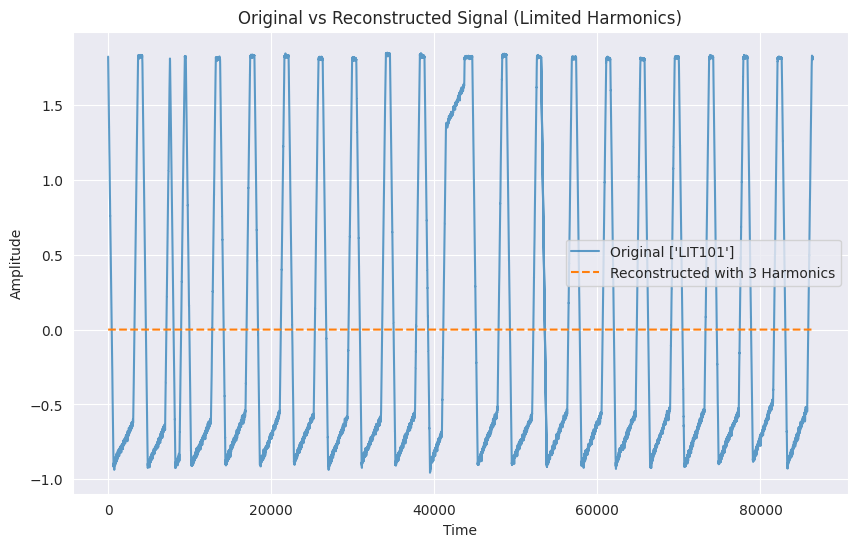

In [51]:
# Assuming 'df' and 'column_name' are defined and passed to the function

# Perform Fourier transform and limit harmonics
reconstructed_signal, fft_data_limited = performFourierAndLimitHarmonics_2(df=df, column_name=column, num_harmonics=10)

# Plotting the original signal
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[column], label=f'Original {column}', alpha=0.7)

# Plotting the reconstructed signal (real part since FFT can give complex values)
plt.plot(df.index, np.real(reconstructed_signal), label=f'Reconstructed with {3} Harmonics', linestyle='--')

# Adding titles and labels
plt.title(f'Original vs Reconstructed Signal (Limited Harmonics)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Display the plot
plt.show()

/home/loz/MSc/MSc_Project/venv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/loz/MSc/MSc_Project/venv/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

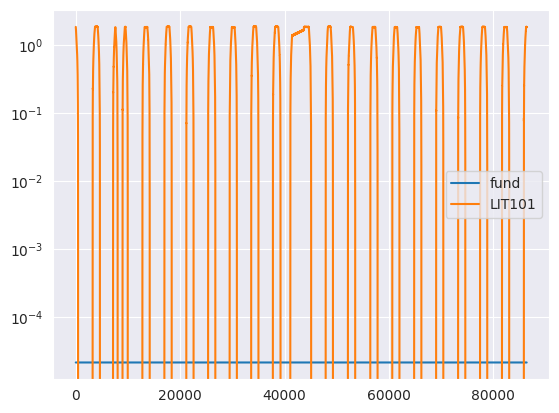

In [36]:
plt.plot(df.index, recon_signal, label='fund')
plt.plot(df.index, df[column], label=column)
plt.legend()
plt.yscale('log')
plt.show